C:\Users\darsh\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/2
313/313 ━━━━━━━━━━━━━━━━━━━━ 31s 90ms/step - accuracy: 0.6873 - loss: 0.5494 - val_accuracy: 0.8584 - val_loss: 0.3295
Epoch 2/2
313/313 ━━━━━━━━━━━━━━━━━━━━ 26s 84ms/step - accuracy: 0.8988 - loss: 0.2617 - val_accuracy: 0.8682 - val_loss: 0.3496
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step


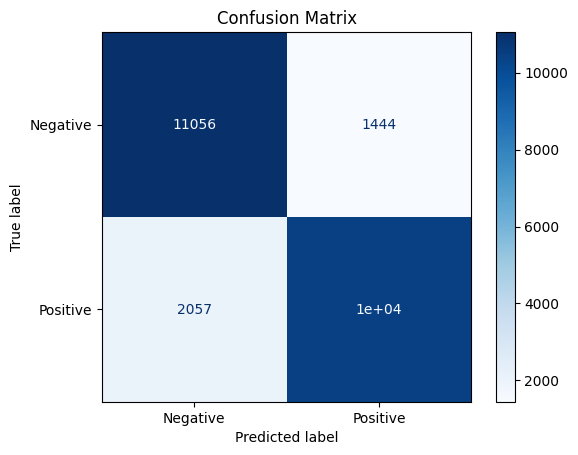

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
vocab_size = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

# Pad sequences
max_len = 200
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

# Build model
model = Sequential([
    Embedding(vocab_size, 32, input_length=max_len),
    LSTM(64),
    Dense(1, activation='sigmoid')
])

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
model.fit(x_train, y_train, epochs=2, batch_size=64, validation_split=0.2)

# Predict on test set
y_pred_prob = model.predict(x_test)
y_pred = (y_pred_prob > 0.5).astype("int32")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In [2]:
#evaluation
loss,acc=model.evaluate(x_test,y_test)
print("TEST ACCURACY = ",acc)

782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step - accuracy: 0.8612 - loss: 0.3631
TEST ACCURACY =  0.8599600195884705
